## Business problem:  where to open an ice-cream shop


## The background: 
A young woman developed a successful tastes of Ice creams and started to sale it from her home, after a while she open a small shop near her home. The sales are great and she dreams about opening number of big shops. She has an investor for her first big shop and she and want it to be very successful. She ask me to find her a suitable city for opening a profitable and successful Ice cream shop .
## A description of the data: 
1.Table with USA big cities data: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population: Data:City,Population amount, Geographic coordinates (lat and lng).
2. Foursquare location data - https://api.foursquare.com:
Data:Geographic coordinates,city,#of reported parks in the city,number of reported Ice cream shops in the City

## The way for solve the problem: 
I will find a connection between amount of population plus number of parks  and the number of ice cream shops in the same city. I will produce a list with City ,expected number of Ice cream shops and real number of 
Ice cream shops.
I will recommend to open the Ice cream shop in the city where the expected number of shops is bigger then the real number of shops


## Week 5
### Data acquisition and cleaning

### USA big cities data

#Producing a list of big cities in USA from Wikipedia

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Libraries imported.')





Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [4]:
url='https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
r=requests.get(url)
url=r.content
soup = BeautifulSoup(url,'html.parser')

In [5]:
My_table=soup.find("table",{"class":"wikitable sortable"})

table_rows = My_table.find_all('tr')

l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)

In [6]:
df=pd.DataFrame(l, columns=["rank","City", "State","2018 estimate","5","6","7","8","9","10","Location"])
df.head()
# new data frame with split value columns # new data frame with split value columns 


new = df["Location"].str.split(" /", n = 2, expand = True) 
  
# making separate first name column from new data frame 
df["Location1"]= new[0] 
  
# making separate last name column from new data frame 
df["Location2"]= new[1] 
new1=df['Location2'].str.split("N",n=2, expand=True)
df["Location3"]= new1[0] 
df["Location4"]= new1[1] 
df.drop(columns =["Location","Location1","Location2","10","9","8","7","6","5"], inplace = True)

  
df.head()
  
# Dropping old Name columns 


,rank,City,State,2018 estimate,Location3,Location4
0,None,None,None,None,None,None
1,1\n,New York[d]\n,New York\n,"8,398,748\n",﻿40.6635°,73.9387°W﻿
2,2\n,Los Angeles\n,California\n,"3,990,456\n",﻿34.0194°,118.4108°W﻿
3,3\n,Chicago\n,Illinois\n,"2,705,994\n",﻿41.8376°,87.6818°W﻿
4,4\n,Houston[3]\n,Texas\n,"2,325,502\n",﻿29.7866°,95.3909°W﻿


In [7]:
df1=df
df1["Location4"]=df["Location4"].str.slice(stop=-3)
df1["Location3"]=df["Location3"].str.slice(stop=-1)
df1["Location3"] = df1["Location3"].astype(str)
df1["Location4"] = df1["Location4"].astype(str)

df1["2018 estimate"]=df["2018 estimate"].str.slice(stop=-1)
df1["State"]=df["State"].str.slice(stop=-1)
df1["City"]=df["City"].str.slice(stop=-1)
df1 = df.drop("rank", axis=1,inplace=True)

df1=df.drop(df.index[0])


df1["Location3"] = df1["Location3"].astype(str)
df1["Location4"] = df1["Location4"].astype(str)
df1["Location3"] = df1["Location3"].str.strip()

df1["Location4"] = df1["Location4"].apply(pd.to_numeric, errors='coerce')
df1["2018 estimate"]=df1["2018 estimate"].str.replace(',', '')
df1["2018 estimate"]=df1["2018 estimate"].astype(float)

df1["Location4"] = df1["Location4"]*(-1)
df1["Location4"] = df1["Location4"].astype(str)
df1["Location3"] = ''+ df1["Location3"].astype(str)





City_popu=df1
City_popu.rename(columns={"Location3": "lat", "Location4": "lng","2018 estimate":"Population","City":"city"},inplace=True)
City_popu.head()


,city,State,Population,lat,lng
1,New York[d],New York,8398748.0,﻿40.6635,-73.9387
2,Los Angeles,California,3990456.0,﻿34.0194,-118.4108
3,Chicago,Illinois,2705994.0,﻿41.8376,-87.6818
4,Houston[3],Texas,2325502.0,﻿29.7866,-95.3909
5,Phoenix,Arizona,1660272.0,﻿33.5722,-112.0901


In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
City_venue100.head()

,city,Ice_Cream_Shop,Park
0,city100,0,0
1,city100,0,0
2,city100,0,0
3,city100,0,0
4,city100,0,0


#For every Big city from the list above we found the near venues from "Foursquare"

In [106]:
CLIENT_ID = 'PH3C5IT4OPSSN3ZIBK0N4ZR5QXUDFJQZLUQOW2AU4M5CCVDB'
CLIENT_SECRET = 'DYAENG5F4ZLVSSIGN4FP4AIFSBBIJ2EPUQQUADO3E4SSA2X3'
VERSION = '20180605'
LIMIT = 200
radius = 3000



i=1
i=int(i)

l1=0
          
for i, row in City_popu.iterrows():
    
   
   
    lat=str(row["lat"])

    lat.strip()
    lat = lat.replace('\ufeff', '')
   
    lng=str(row["lng"])
    lng.strip()
    

   
    #if i<30:
       #print(i)
    #else:
        #break

    if i>100:
        break
        
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
   
    results = requests.get(url).json()
    
       
        
            

    try:   

        def get_category_type(row):
            try:
                categories_list=row['categories']
            except:
                categories_list=row['venue.categories']
            if len(categories_list)==0:
                return None
            else:
                return categories_list[0]['name']

        venues=results['response']['groups'][0]['items']
        nearby_venues=json_normalize(venues)
        
        filtered_columns=['venue.name','venue.categories','venue.location.lat','venue.location.lng','venue.location.city']
        
        nearby_venues=nearby_venues.loc[:,filtered_columns]
        
        nearby_venues['venue.categories']=nearby_venues.apply(get_category_type,axis=1)
        nearby_venues.columns=[col.split(".")[-1] for col in nearby_venues.columns]
        
        nearby_venues1=nearby_venues
        
        nearby_venues1["Park"] = nearby_venues['categories'].apply(lambda x: 1 if 'Park' in x else 0)
        nearby_venues1["Ice_Cream_Shop"]= nearby_venues['categories'].apply(lambda x: 1 if 'Ice' in x else 0)


        nearby_venues2=nearby_venues1[["city","Ice_Cream_Shop","Park"]]

        


        grouped = nearby_venues2.groupby(['city']).agg(['sum'])
        grouped.reset_index(inplace=True)
        
        
        #print("grouprd_first_line",grouped.iloc[[0]])
        
        city_venues=pd.DataFrame(grouped)
        city_venues.columns = ['city','Ice_Cream_Shop','Park']
        l=city_venues.shape[0]
        
        
        
        City_venue100.iloc[i,0]=city_venues.iloc[0,0]
        City_venue100.iloc[i,1]=city_venues.iloc[0,1]
        City_venue100.iloc[i,2]=city_venues.iloc[0,2]
    
        
                        



    except Exception:
        
        pass  

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [107]:
print("city_venue100",City_venue100.head())
print("City_popu",City_popu.head())
import pandas as pd
My_dataframe = pd.merge(City_popu, City_venue100, on='city',how='inner')
My_dataframe["Population"]=My_dataframe["Population"].replace(',', '')
My_dataframe["Population"]=My_dataframe["Population"].astype(float)
print("My_dataframe:",My_dataframe.head(5))

#My_dataframe[["Population","Park", "Ice_Cream_Shop"]] = My_dataframe[["Population","Park", "Ice_Cream_Shop"]].apply(pd.to_numeric)
#print(My_dataframe.Population)
#print(My_dataframe.Park)

#print("My_dataframe:",My_dataframe.head(20))

city_venue100           city  Ice_Cream_Shop  Park
0      city100               0     0
1     Brooklyn               1     1
2  Culver City               0     1
3      Chicago               2     4
4      Houston               4     2
City_popu           city        State  Population       lat        lng
1  New York[d]     New York   8398748.0  ﻿40.6635   -73.9387
2  Los Angeles   California   3990456.0  ﻿34.0194  -118.4108
3      Chicago     Illinois   2705994.0  ﻿41.8376   -87.6818
4   Houston[3]        Texas   2325502.0  ﻿29.7866   -95.3909
5      Phoenix      Arizona   1660272.0  ﻿33.5722  -112.0901
My_dataframe:         city        State  Population       lat        lng  Ice_Cream_Shop  \
0    Chicago     Illinois   2705994.0  ﻿41.8376   -87.6818               2   
1    Phoenix      Arizona   1660272.0  ﻿33.5722  -112.0901               1   
2  San Diego   California   1425976.0  ﻿32.8153   -117.135               1   
3     Dallas        Texas   1345047.0  ﻿32.7933   -96.7665    

## Checking  the correlation between the features

In [110]:
print(My_dataframe.corr())

                Population  Ice_Cream_Shop      Park
Population        1.000000        0.113178  0.118905
Ice_Cream_Shop    0.113178        1.000000  0.139928
Park              0.118905        0.139928  1.000000


# Predictive the number of Ice_cream_shop according the population amount and the numbers of Parks

In [108]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
X=My_dataframe[['Park']]
Y=My_dataframe['Ice_Cream_Shop']
lm.fit(X,Y)
Yhat=lm.predict(X)
print('b',lm.intercept_)
print('a',lm.coef_)


b 0.9318637274549098
a [0.05811623]


(0, 4.20058176968359)

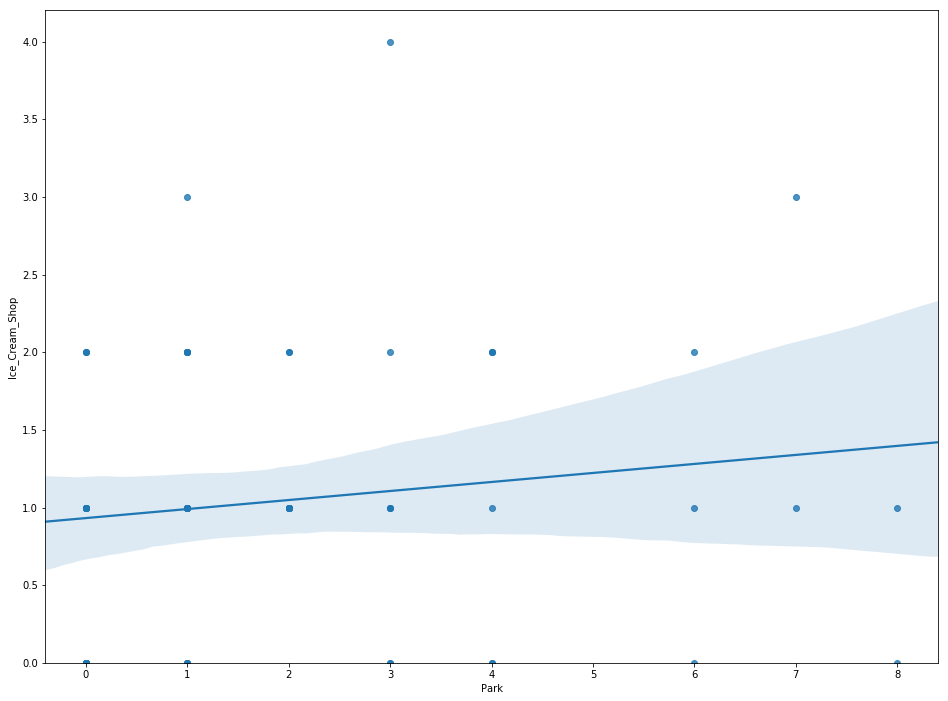

In [111]:
import seaborn as sns
%matplotlib inline
width=16
height=12
plt.figure(figsize=(width,height))
sns.regplot(x='Park',y='Ice_Cream_Shop',data=My_dataframe)
plt.ylim(0,)

b 0.9212914910219785
a [2.42278507e-07]


(0, 4.20058176968359)

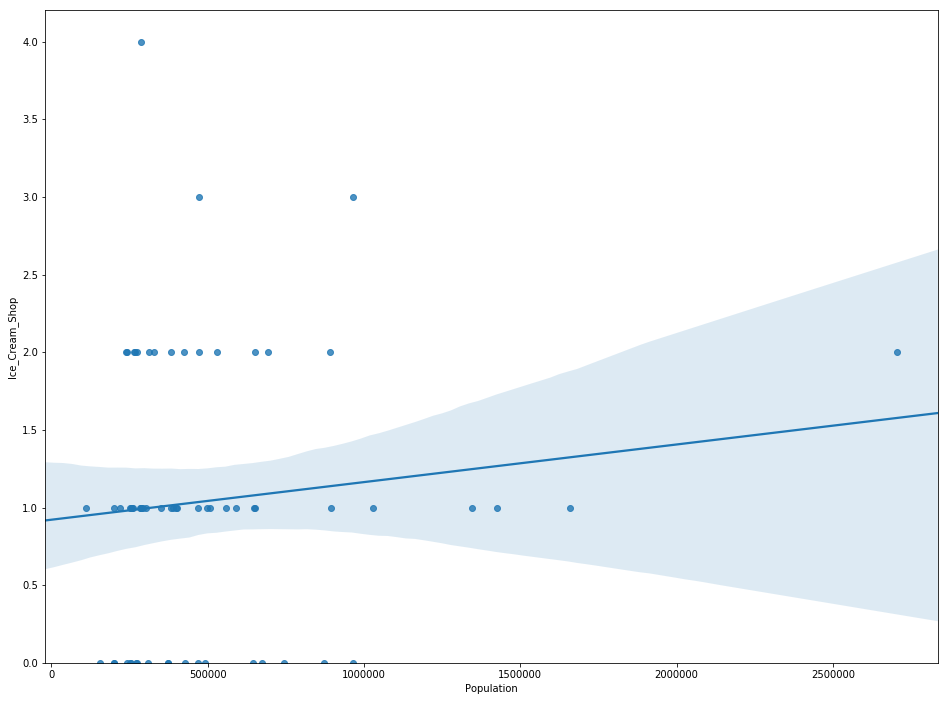

In [112]:

X=My_dataframe[['Population']]
Y=My_dataframe['Ice_Cream_Shop']
lm.fit(X,Y)
Yhat=lm.predict(X)
print('b',lm.intercept_)
print('a',lm.coef_)
width=16
height=12
plt.figure(figsize=(width,height))
sns.regplot(x='Population',y='Ice_Cream_Shop',data=My_dataframe)
plt.ylim(0,)

In [121]:
print(My_dataframe.sort_values('Park',ascending=False).head(10))
print(My_dataframe.sort_values('Population',ascending=False).head(10))
print(My_dataframe.sort_values(['Population','Park'],ascending=False).head(30))

           city           State  Population       lat        lng  \
65     Richmond      California    110146.0  ﻿37.9523  -122.3606   
50  Chula Vista      California    271651.0  ﻿32.6277  -117.0152   
5        Austin           Texas    964254.0  ﻿30.3039   -97.7544   
47       Irvine      California    282572.0  ﻿33.6784  -117.7713   
16    Las Vegas          Nevada    644644.0  ﻿36.2292  -115.2601   
21      Atlanta         Georgia    498044.0  ﻿33.7629   -84.4227   
11       Boston   Massachusetts    694583.0  ﻿42.3320   -71.0202   
52  Jersey City      New Jersey    265549.0  ﻿40.7114   -74.0648   
51   Fort Wayne         Indiana    267633.0  ﻿41.0882   -85.1439   
41   Saint Paul       Minnesota    307695.0  ﻿44.9489   -93.1041   

    Ice_Cream_Shop  Park  
65               1     8  
50               0     8  
5                3     7  
47               1     7  
16               0     6  
21               1     6  
11               2     6  
52               2     4  
51      

### I will recommand to open an Ice cream shop in
#### Las Vegas in an are with 6 parks withourt Ice cream shop (644,644 citizens)
#### Bostone in an area with 6 park and only 1 Ice cream shop (694,583 citizens)
#### Atlanta  in an area with 6 park and only 2 Ice cream shop (498,044citizens)

#### I will present the potencial place on the map 

In [120]:

locations = nearby_venues1[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]


lat1=36.2292 
lng1=-115.2601  


venues_map=folium.Map(location=[lat1,lng1],zoom_start=10,width=750, height=500)
for point in range(0, 20):
    folium.Marker(locationlist[point], popup=nearby_venues1['name'][point]).add_to(venues_map)
venues_map


